# <center>UE22CS342AA2 - Data Analytics - Worksheet 4c</center>

# <center>Knowledge-based recommender systems</center>

<center> Designed by Amritha GK, PESU-25  </center>

<br>

- Student name: Mohul Y P
- SRN: PES1UG22CS360
- Section: F

<br>

Knowledge-based recommender systems are helpful when dealing with domains where user preferences are complex and the item/target contains a large number of attributes. They also help in overcoming challenges such as the cold-start problem, which occur with content-based or collaborative filtering techniques.

There are mainly two types of Knowledge-based recommender systems: Contraint-based and Case-based.

With this exercise, we will be diving into **simple case-based recommender systems**.


The dataset contains several attributes regarding pre-owned cars, which are listed below:

1. ID

2. Price - in dollars

3. Manufacturer

4. Model

5. Prod. year

6. Category - based on body type

7. Leather interior - "Yes" or "No"

8. Fuel type

9. Engine volume - in litres

10. Mileage - here, the distance travelled by the car, in km.

11. Cylinders - number of cylinders in the engine

12. Gear box type - the type of transmission

13. Drive wheels - drivetrain configuration

14. Doors - number of doors

15. Wheel - the side of the steering wheel

16. Color

17. Airbags - number of airbags



#### The task is to build a simple Case-based Recommender System to recommend these cars to prospective buyers.


#### Breakdown of points:

|Sl. No.| Criterion | Points |
|--| :--------- | ------ |
|1| Data exploration and Preprocessing | 3 points |
|2| Case-based model | 3 points |
|3| Explanation of the model workflow | 3 points |


### Note:

- The model must take a target instance as input from the user

- Use suitable similarity metrics

- For ease of implementation, provide simple critiquing for any **one** feature of your choice, to improve recommendations

## Imports and Loading the data

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

from scipy import stats

In [2]:
df = pd.read_csv("/kaggle/input/preowned-cars-dataset/Worksheet-4c_preowned_cars_dataset.csv")

## 1. EDA and Preprocessing

In [3]:
df

ID  Price   Manufacturer    Model  Prod. year   Category  \
0      45654403  13328          LEXUS   RX 450        2010       Jeep   
1      44731507  16621      CHEVROLET  Equinox        2011       Jeep   
2      45774419   8467          HONDA      FIT        2006  Hatchback   
3      45769185   3607           FORD   Escape        2011       Jeep   
4      45809263  11726          HONDA      FIT        2014  Hatchback   
...         ...    ...            ...      ...         ...        ...   
19192  45798355   8467  MERCEDES-BENZ  CLK 200        1999      Coupe   
19193  45778856  15681        HYUNDAI   Sonata        2011      Sedan   
19194  45804997  26108        HYUNDAI   Tucson        2010       Jeep   
19195  45793526   5331      CHEVROLET  Captiva        2007       Jeep   
19196  45813273    470        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
19192              Yes       CNG     2.0 Turbo  300000 km        4.0   
19193              Yes    Petrol           2.4  161600 km        4.0   
19194              Yes    Diesel             2  116365 km        4.0   
19195              Yes    Diesel             2   51258 km        4.0   
19196              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels Doors             Wheel   Color  Airbags  
0         Automatic          4x4   4/5        Left wheel  Silver       12  
1         Tiptronic          4x4   4/5        Left wheel   Black        8  
2          Variator        Front   4/5  Right-hand drive   Black        2  
3         Automatic          4x4   4/5        Left wheel   White        0  
4         Automatic        Front   4/5        Left wheel  Silver        4  
...             ...          ...   ...               ...     ...      ...  
19192        Manual         Rear   2/3        Left wheel  Silver        5  
19193     Tiptronic        Front   4/5        Left wheel     Red        8  
19194     Automatic        Front   4/5        Left wheel    Grey        4  
19195     Automatic        Front   4/5        Left wheel   Black        4  
19196     Automatic        Front   4/5        Left wheel   White       12  

[19197 rows x 17 columns]

In [4]:
df.drop(columns=['Manufacturer', 'Model', 'Category', 'Leather interior','Color','Doors'], inplace=True)


In [5]:
df.shape           # Number of rows and columns
df.info()          # Data types and non-null counts
df.describe()      # Summary statistics for numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19197 entries, 0 to 19196
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             19197 non-null  int64  
 1   Price          19197 non-null  int64  
 2   Prod. year     19197 non-null  int64  
 3   Fuel type      19197 non-null  object 
 4   Engine volume  19197 non-null  object 
 5   Mileage        19197 non-null  object 
 6   Cylinders      19197 non-null  float64
 7   Gear box type  19197 non-null  object 
 8   Drive wheels   19197 non-null  object 
 9   Wheel          19197 non-null  object 
 10  Airbags        19197 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 1.6+ MB


ID         Price    Prod. year     Cylinders       Airbags
count  1.919700e+04  1.919700e+04  19197.000000  19197.000000  19197.000000
mean   4.557758e+07  1.853464e+04   2010.915612      4.582747      6.581185
std    9.355772e+05  1.907675e+05      5.669518      1.200034      4.321081
min    2.074688e+07  1.000000e+00   1939.000000      1.000000      0.000000
25%    4.569993e+07  5.331000e+03   2009.000000      4.000000      4.000000
50%    4.577236e+07  1.317200e+04   2012.000000      4.000000      6.000000
75%    4.580204e+07  2.206300e+04   2015.000000      4.000000     12.000000
max    4.581665e+07  2.630750e+07   2020.000000     16.000000     16.000000

In [6]:
from scipy import stats

df = df[np.abs(stats.zscore(df['Price'])) < 3]


### Transforming some columns for better representation

Many columns here are given as an 'Object' type and have to be converted to the suitable format for our usage.\

Below is an example for the column "Engine Volume".



Do you see any other columns that might require a similar transformation? If yes, transform the column(s) and proceed with the EDA.

In [7]:
## Currently, both the engine volume and presence of turbocharging are mentioned in the same column as a string. 

## Here, we split them into two different columns and transform them as required

df[['Engine volume', 'Turbo']] = df['Engine volume'].str.extract(r'(\d+\.?\d*)\s*(Turbo)?')

df['Engine volume'] = df['Engine volume'].astype(float)



# # Replace 'Turbo' and 'NaN' with 1 and 0 as Binary Encoding]

df['Turbo'] = df['Turbo'].apply(lambda x: 1 if x == 'Turbo' else 0)

/tmp/ipykernel_33/3407025350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Engine volume', 'Turbo']] = df['Engine volume'].str.extract(r'(\d+\.?\d*)\s*(Turbo)?')
/tmp/ipykernel_33/3407025350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Engine volume', 'Turbo']] = df['Engine volume'].str.extract(r'(\d+\.?\d*)\s*(Turbo)?')
/tmp/ipykernel_33/3407025350.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [8]:
# Remove the ' km' suffix and convert to numeric
df['Mileage'] = df['Mileage'].str.replace(' km', '').astype(int)

/tmp/ipykernel_33/988066298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'] = df['Mileage'].str.replace(' km', '').astype(int)


### Perform visualizations and explore the data further, Clean the dataset

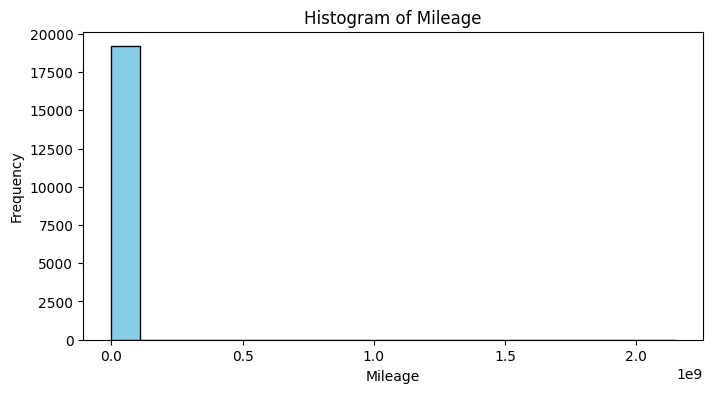

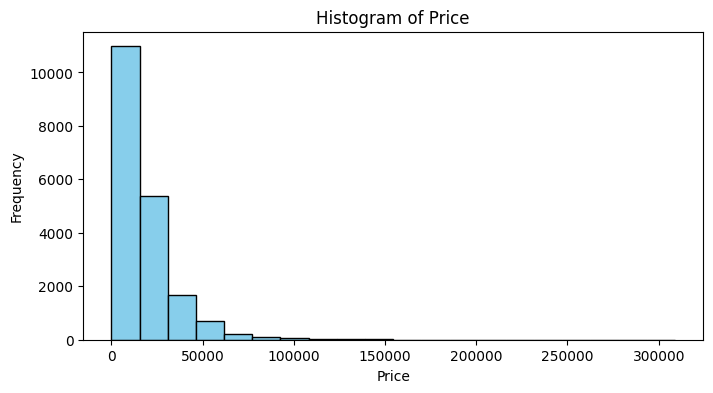

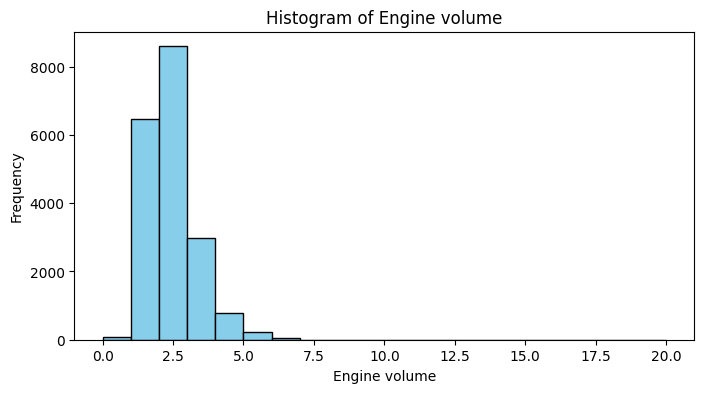

In [9]:
columns_to_plot = ['Mileage', 'Price', 'Engine volume']

# Plot histograms for the selected columns
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

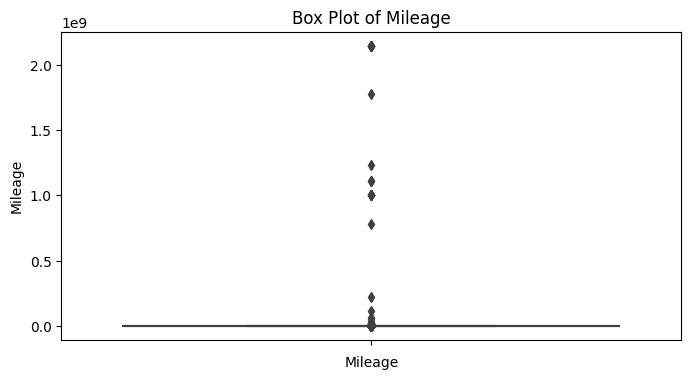

In [10]:
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

In [11]:
df = df[np.abs(stats.zscore(df['Price'])) < 3]
df = df[np.abs(stats.zscore(df['Mileage'])) < 3]
df = df[np.abs(stats.zscore(df['Engine volume'])) < 3]

In [12]:
# Your code here

## 2. Case-based model

Points to consider:

- Use suitable similarity metrics

- The model must take a target instance as input from the user

- <b>For ease of implementation, provide simple critiquing for any 1 feature of your choice, to improve recommendations</b>

### Similarity meaures

Since this dataset has attributes of both numerical and categorical types, we need to use suitable similarity measures for each.



For numerical attributes, we can use the Euclidean distance metric or cosine similarity.



Here are some measures that could be used for categorical attributes: 

- Hamming Distance

- Jaccard Similarity

- Converting them into Dense Vectors (as embeddings) by training a Neural Network



Techniques like <b>Metric Learning</b> can be used to construct task-specific distance metrics using Machine Learning.



You could explore the below paper to learn about some more similarity measures for categorical variables:

https://epubs.siam.org/doi/pdf/10.1137/1.9781611972788.22?download=true






In [13]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean, hamming


# Preprocessing function to handle categorical data and scale numeric data
def preprocess_data(df):
    # Convert categorical variables to dummy variables
    df = pd.get_dummies(df, columns=[ 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel'])
    
    # Normalize numeric columns
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    df[['Price', 'Mileage', 'Engine volume']] = scaler.fit_transform(df[['Price', 'Mileage', 'Engine volume']])
    
    return df

df = preprocess_data(df)

# Function to calculate similarity score using a combined metric
def calculate_similarity(target, candidate, num_features, cat_features):
    # Euclidean distance for numeric features
    num_sim = euclidean(target[num_features], candidate[num_features])
    
    # Hamming distance for categorical features
    cat_sim = hamming(target[cat_features], candidate[cat_features])
    
    # Weighted combination (tune weights based on importance)
    similarity_score = num_sim + cat_sim
    return similarity_score


### Obtaining the user input for the target case

In [14]:
df

ID     Price  Prod. year  Engine volume   Mileage  Cylinders  \
0      45654403  0.186386        2010       0.729167  0.001674        6.0   
1      44731507  0.232441        2011       0.625000  0.001728        6.0   
2      45774419  0.118402        2006       0.270833  0.001800        4.0   
3      45769185  0.050432        2011       0.520833  0.001521        4.0   
4      45809263  0.163981        2014       0.270833  0.000827        4.0   
...         ...       ...         ...            ...       ...        ...   
19192  45798355  0.118402        1999       0.416667  0.002700        4.0   
19193  45778856  0.219295        2011       0.500000  0.001454        4.0   
19194  45804997  0.365123        2010       0.416667  0.001047        4.0   
19195  45793526  0.074543        2007       0.416667  0.000461        4.0   
19196  45813273  0.006559        2012       0.500000  0.001682        4.0   

       Airbags  Turbo  Fuel type_CNG  Fuel type_Diesel  ...  \
0           12      0          False             False  ...   
1            8      0          False             False  ...   
2            2      0          False             False  ...   
3            0      0          False             False  ...   
4            4      0          False             False  ...   
...        ...    ...            ...               ...  ...   
19192        5      1           True             False  ...   
19193        8      0          False             False  ...   
19194        4      0          False              True  ...   
19195        4      0          False              True  ...   
19196       12      0          False             False  ...   

       Fuel type_Plug-in Hybrid  Gear box type_Automatic  \
0                         False                     True   
1                         False                    False   
2                         False                    False   
3                         False                     True   
4                         False                     True   
...                         ...                      ...   
19192                     False                    False   
19193                     False                    False   
19194                     False                     True   
19195                     False                     True   
19196                     False                     True   

       Gear box type_Manual  Gear box type_Tiptronic  Gear box type_Variator  \
0                     False                    False                   False   
1                     False                     True                   False   
2                     False                    False                    True   
3                     False                    False                   False   
4                     False                    False                   False   
...                     ...                      ...                     ...   
19192                  True                    False                   False   
19193                 False                     True                   False   
19194                 False                    False                   False   
19195                 False                    False                   False   
19196                 False                    False                   False   

       Drive wheels_4x4  Drive wheels_Front  Drive wheels_Rear  \
0                  True               False              False   
1                  True               False              False   
2                 False                True              False   
3                  True               False              False   
4                 False                True              False   
...                 ...                 ...                ...   
19192             False               False               True   
19193             False                True              False   
19194             False                True            

In [15]:
# Example target instance from user
target_car = {
    'Price': 20000,                          # Price in dollars
    'Mileage': 50000,                        # Mileage in kilometers
    'Prod. year': 2018,                      # Production year of the car
    'Engine volume': 2.0,                    # Engine volume in liters
    'Leather interior': 1,                   # 1 for Yes, 0 for No
    'Airbags': 4,                            # Number of airbags
    'Manufacturer': 'HYUNDAI',               # Car Manufacturer (categorical feature)
    'Model': 'Corolla',                      # Model of the car (categorical feature)
    'Category': 'Sedan',                     # Body type category (categorical feature)
    'Cylinders': 4,                          # Number of engine cylinders
    'Doors': 4,                              # Number of doors
    'Color': 'Blue',                         # Color of the car
    'Turbo': 0,                              # Turbo (1 for Yes, 0 for No)
    'Fuel type_CNG': 0,                      # Fuel type CNG
    'Fuel type_Diesel': 0,                   # Fuel type Diesel
    'Fuel type_Hybrid': 0,                   # Fuel type Hybrid
    'Fuel type_Hydrogen': 0,                 # Fuel type Hydrogen
    'Fuel type_LPG': 0,                      # Fuel type LPG
    'Fuel type_Petrol': 1,                   # Fuel type Petrol
    'Fuel type_Plug-in Hybrid': 0,           # Fuel type Plug-in Hybrid
    'Gear box type_Automatic': 0,            # Automatic gearbox
    'Gear box type_Manual': 1,               # Manual gearbox
    'Gear box type_Tiptronic': 0,            # Tiptronic gearbox
    'Gear box type_Variator': 0,             # Variator gearbox
    'Drive wheels_4x4': 0,                   # Drive wheels 4x4
    'Drive wheels_Front': 1,                 # Front drive wheels
    'Drive wheels_Rear': 0,                  # Rear drive wheels
    'Wheel_Left wheel': 1,                   # Left steering wheel
    'Wheel_Right-hand drive': 0              # Right-hand steering wheel
}



# Process the target input to match the format of our DataFrame
target_df = pd.DataFrame([target_car])

# Define numerical and categorical columns based on preprocessed data
num_features = ['Price', 'Mileage', 'Prod. year', 'Engine volume']
cat_features = [col for col in df.columns if col not in num_features and col != 'ID']


In [16]:
print(df.columns)

Index(['ID', 'Price', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Airbags', 'Turbo', 'Fuel type_CNG', 'Fuel type_Diesel',
       'Fuel type_Hybrid', 'Fuel type_Hydrogen', 'Fuel type_LPG',
       'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid',
       'Gear box type_Automatic', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator', 'Drive wheels_4x4',
       'Drive wheels_Front', 'Drive wheels_Rear', 'Wheel_Left wheel',
       'Wheel_Right-hand drive'],
      dtype='object')


In [17]:
print(target_df.columns)

Index(['Price', 'Mileage', 'Prod. year', 'Engine volume', 'Leather interior',
       'Airbags', 'Manufacturer', 'Model', 'Category', 'Cylinders', 'Doors',
       'Color', 'Turbo', 'Fuel type_CNG', 'Fuel type_Diesel',
       'Fuel type_Hybrid', 'Fuel type_Hydrogen', 'Fuel type_LPG',
       'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid',
       'Gear box type_Automatic', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator', 'Drive wheels_4x4',
       'Drive wheels_Front', 'Drive wheels_Rear', 'Wheel_Left wheel',
       'Wheel_Right-hand drive'],
      dtype='object')


### Making recommendations

Display the top-10 recommendations

In [18]:
df[cat_features] = df[cat_features].astype(int)

In [19]:
df

ID     Price  Prod. year  Engine volume   Mileage  Cylinders  \
0      45654403  0.186386        2010       0.729167  0.001674          6   
1      44731507  0.232441        2011       0.625000  0.001728          6   
2      45774419  0.118402        2006       0.270833  0.001800          4   
3      45769185  0.050432        2011       0.520833  0.001521          4   
4      45809263  0.163981        2014       0.270833  0.000827          4   
...         ...       ...         ...            ...       ...        ...   
19192  45798355  0.118402        1999       0.416667  0.002700          4   
19193  45778856  0.219295        2011       0.500000  0.001454          4   
19194  45804997  0.365123        2010       0.416667  0.001047          4   
19195  45793526  0.074543        2007       0.416667  0.000461          4   
19196  45813273  0.006559        2012       0.500000  0.001682          4   

       Airbags  Turbo  Fuel type_CNG  Fuel type_Diesel  ...  \
0           12      0              0                 0  ...   
1            8      0              0                 0  ...   
2            2      0              0                 0  ...   
3            0      0              0                 0  ...   
4            4      0              0                 0  ...   
...        ...    ...            ...               ...  ...   
19192        5      1              1                 0  ...   
19193        8      0              0                 0  ...   
19194        4      0              0                 1  ...   
19195        4      0              0                 1  ...   
19196       12      0              0                 0  ...   

       Fuel type_Plug-in Hybrid  Gear box type_Automatic  \
0                             0                        1   
1                             0                        0   
2                             0                        0   
3                             0                        1   
4                             0                        1   
...                         ...                      ...   
19192                         0                        0   
19193                         0                        0   
19194                         0                        1   
19195                         0                        1   
19196                         0                        1   

       Gear box type_Manual  Gear box type_Tiptronic  Gear box type_Variator  \
0                         0                        0                       0   
1                         0                        1                       0   
2                         0                        0                       1   
3                         0                        0                       0   
4                         0                        0                       0   
...                     ...                      ...                     ...   
19192                     1                        0                       0   
19193                     0                        1                       0   
19194                     0                        0                       0   
19195                     0                        0                       0   
19196                     0                        0                       0   

       Drive wheels_4x4  Drive wheels_Front  Drive wheels_Rear  \
0                     1                   0                  0   
1                     1                   0                  0   
2                     0                   1                  0   
3                     1                   0                  0   
4                     0                   1                  0   
...                 ...                 ...                ...   
19192                 0                   0                  1   
19193                 0                   1                  0   
19194                 0                   1            

In [20]:
# Calculate similarity scores for each candidate car
df['similarity_score'] = df.apply(lambda x: calculate_similarity(target_df.iloc[0], x, num_features, cat_features), axis=1)

# Sort by similarity score and get the top 10 recommendations
top_10_recommendations = df.sort_values(by='similarity_score', ascending=True).head(10)
print("Top 10 Recommendations:")
print(top_10_recommendations[['ID', 'Price', 'Mileage', 'Prod. year', 'Engine volume', 'similarity_score']])


Top 10 Recommendations:
             ID     Price   Mileage  Prod. year  Engine volume  \
18437  45762605  0.153492  1.000000        2002       0.562500   
1399   45814878  0.127185  0.500010        2002       0.583333   
17820  45733598  0.988462  0.000312        2018       0.416667   
14232  45809637  0.976280  0.000200        2018       0.312500   
1951   45733427  0.972015  0.000683        2018       0.416667   
6835   45733596  0.972015  0.000259        2018       0.416667   
10750  45733426  0.972015  0.000216        2018       0.416667   
11117  45761023  0.087704  0.522080        1995       0.416667   
9773   45809878  0.953022  0.000386        2018       0.312500   
13567  45803162  0.949652  0.000018        2020       0.416667   

       similarity_score  
18437      53851.138670  
1399       53851.349510  
17820      53851.385970  
14232      53851.390601  
1951       53851.391734  
6835       53851.392128  
10750      53851.392168  
11117      53851.398853  
9773       5385

### Critiquing



Implement Simple Directional Critiquing for any **one** feature of the dataset and display the updated recommendations(top-10)

In [21]:
# Define a function to critique based on Price
def critique_price(recommendations, adjustment):
    # Adjust the target price by a certain amount
    target_df['Price'] += adjustment
    
    # Recalculate similarity scores with the new target price
    recommendations['similarity_score'] = recommendations.apply(lambda x: calculate_similarity(target_df.iloc[0], x, num_features, cat_features), axis=1)
    
    # Get new top 10 recommendations
    updated_recommendations = recommendations.sort_values(by='similarity_score', ascending=True).head(10)
    return updated_recommendations

# Example: increase the price preference by 10% for critiquing
adjustment = 0.1  # Adjust up by 10% of normalized price
updated_top_10 = critique_price(df, adjustment)
print("Updated Top 10 Recommendations after Critiquing:")
print(updated_top_10[['ID', 'Price', 'Mileage', 'Prod. year', 'Engine volume', 'similarity_score']])


Updated Top 10 Recommendations after Critiquing:
             ID     Price   Mileage  Prod. year  Engine volume  \
18437  45762605  0.153492  1.000000        2002       0.562500   
1399   45814878  0.127185  0.500010        2002       0.583333   
17820  45733598  0.988462  0.000312        2018       0.416667   
14232  45809637  0.976280  0.000200        2018       0.312500   
1951   45733427  0.972015  0.000683        2018       0.416667   
6835   45733596  0.972015  0.000259        2018       0.416667   
10750  45733426  0.972015  0.000216        2018       0.416667   
11117  45761023  0.087704  0.522080        1995       0.416667   
9773   45809878  0.953022  0.000386        2018       0.312500   
13567  45803162  0.949652  0.000018        2020       0.416667   

       similarity_score  
18437      53851.175809  
1399       53851.386649  
17820      53851.423108  
14232      53851.427739  
1951       53851.428871  
6835       53851.429265  
10750      53851.429305  
11117      53851

## 3. Explain your approach in detail, with reasoning: how you preprocessed the data, the similarity metrics you chose and the overall workflow of your recommendation model

1. Data Preprocessing
Preprocessing the data was the first and most crucial step to ensure consistency and compatibility between the target car and the dataset. Here’s how it was done:

One-Hot Encoding:

Categorical columns like Fuel type, Gear box type, Drive wheels, etc., were one-hot encoded. This created binary columns for each category (e.g., Fuel type_Petrol, Fuel type_Diesel, etc.), allowing for numerical representation of categorical data.
This ensured all categorical variables were treated equally and prepared for distance-based similarity computation.
Handling Missing Features:

Numerical Features: Continuous variables like Price, Mileage, Prod. year, and Engine volume were grouped together.
Categorical Features: Binary or one-hot encoded columns were treated as categorical (e.g., Fuel type_, Gear box type_).
This preprocessing ensured uniformity and avoided errors when calculating similarity scores.




2. Similarity Metrics
Two key similarity metrics were chosen to account for both numerical and categorical data:

Euclidean Distance for Numerical Features:

Euclidean distance was used to measure the difference between numerical features (e.g., Price, Mileage, etc.).
​
 
This metric captures the magnitude of differences between numerical attributes.
Hamming Distance for Categorical Features:

Hamming distance was used to compare binary categorical features.
Formula:
Hamming Distance
=
Number of differing bits
Total number of bits
Hamming Distance= 
Total number of bits
Number of differing bits
​
 
This ensures that mismatches in categorical variables (e.g., Fuel type, Gear box type) are properly accounted for.
Weighted Combination of Distances:

To combine numerical and categorical similarities into a single metric, both distances were normalized and added with equal weights. This allows the recommendation model to fairly balance the influence of both feature types.

Formula:

Similarity Score
= 𝑤1.Euclidean Distance + 𝑤2.Hamming Distance



### 3. Workflow of the Recommendation Model
Input Target Car:

The user inputs details of the target car, including numerical and categorical attributes.

Calculate Similarity Scores:

For each car in the dataset, the similarity score between the target car and the candidate car was calculated:
Numerical Similarity: Using Euclidean distance on numerical columns.
Categorical Similarity: Using Hamming distance on one-hot encoded categorical columns.
The two similarity metrics were combined into a final similarity score.
Sorting and Recommendations:

Cars in the dataset were sorted by their similarity scores (ascending order, where lower scores indicate greater similarity).
The top 10 cars with the lowest similarity scores were returned as recommendations.
Output:

The final output included the top 10 most similar cars to the target car, providing users with personalized recommendations.

<br>

With this, you have successfully reached the end of this worksheet.



Hope these assignments helped you hone your DA skills and also encouraged you to learn some new concepts.



### Wishing you all the best!